**Titanic Survival Prediction**
 The objective of this project is to predict whether a passenger on the titanic survived or not by using machine learning techniques.

Dataset used for this project contains information about individual passengers,such as their age,gender,ticket,class,fare,cabin etc

In [1]:
#import modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
titanic = pd.read_csv('tested.csv')

In [3]:
titanic.shape

(418, 12)

In [4]:
#decsribe data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

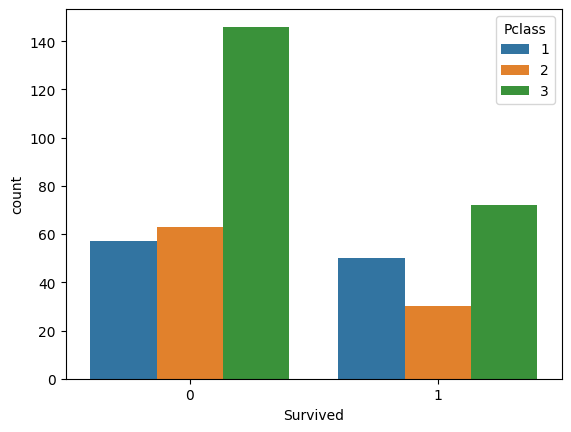

In [7]:
#Data Visualization
sns.countplot(x=titanic['Survived'],hue=titanic['Pclass'])

In [8]:
titanic["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

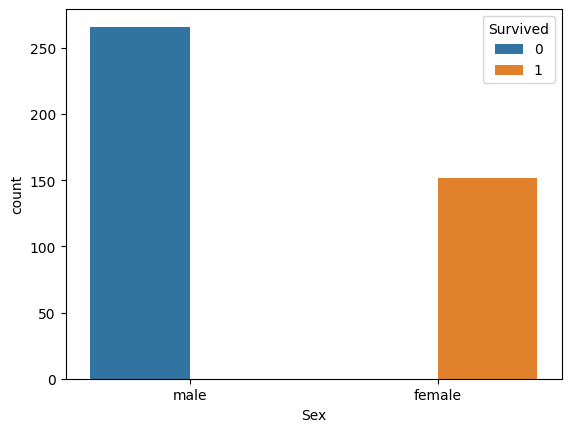

In [9]:
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])

In [10]:
#Data Preprocessing
ports = pd.get_dummies(titanic.Embarked,prefix = 'Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [11]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'],axis = 1,inplace = True)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [13]:
titanic.Sex = titanic.Sex.map({'male':0,'female':1})

In [15]:
titanic.drop(['Cabin','Ticket','Name','PassengerId'],axis = 1 ,inplace = True)

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        417 non-null    float64
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [17]:
titanic.isnull().values.any()

True

In [18]:
titanic[pd.isnull(titanic).any(axis = 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
10,0,3,0,NaN,0,0,7.8958,0,0,1
22,1,1,1,NaN,0,0,31.6833,0,0,1
29,0,3,0,NaN,2,0,21.6792,1,0,0
33,1,3,1,NaN,1,2,23.4500,0,0,1
36,1,3,1,NaN,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
408,1,3,1,NaN,0,0,7.7208,0,1,0
410,1,3,1,NaN,0,0,7.7500,0,1,0
413,0,3,0,NaN,0,0,8.0500,0,0,1
416,0,3,0,NaN,0,0,8.0500,0,0,1


In [20]:
titanic.Age.fillna(titanic.Age.mean(),inplace = True)

In [21]:
titanic.isnull().values.any()

True

In [22]:
titanic.Fare.fillna(titanic.Fare.mean(),inplace = True)

In [23]:
titanic.isnull().values.any()

False

In [24]:
#Define Target Variable (y) and Feature Variables (X)
y = titanic.Survived.copy()
X = titanic.drop(['Survived'],axis = 1)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [27]:
#Modeling and model evalution
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((334, 9), (84, 9), (334,), (84,))

In [30]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.intercept_

array([-2.42092814])

In [32]:
#model Prediction
model.score(X_train,y_train)

1.0

In [33]:
model.score(X_valid,y_valid)

1.0